In [2]:
# Monty Hall Game in Python
import random

def play_monty_hall(choice):
    # Prizes behind the door
    # initial ordering doesn't matter
    prizes = ['goat', 'car', 'goat']
    
    # Randomizing the prizes
    random.shuffle(prizes) 
    
    # Determining door without car to open
    while True:
        opening_door = random.randrange(len(prizes))
        if prizes[opening_door] != 'car' and choice-1 != opening_door:
            break
    
    opening_door = opening_door + 1
    print('We are opening the door number-%d' % (opening_door))
    
    # Determining switching door
    options = [1,2,3]
    options.remove(choice)
    options.remove(opening_door)
    switching_door = options[0]
    
    # Asking for switching the option
    print('Now, do you want to switch to door number-%d? (yes/no)' %(switching_door))
    answer = input()
    if answer == 'yes':
        result = switching_door - 1
    else:
        result = choice - 1
    
    # Displaying the player's prize 
    print('And your prize is ....', prizes[result].upper())
    
# Reading initial choice
choice = int(input('Which door do you want to choose? (1,2,3): '))

# Playing game
play_monty_hall(choice)

Which door do you want to choose? (1,2,3): 3
We are opening the door number-1
Now, do you want to switch to door number-2? (yes/no)
yes
And your prize is .... GOAT


How many doors do you want?
50
Monty Hall 50 doors: Percentage of Switch strategy and win probability is: 98.260000 %
Monty Hall 50 doors: Percentage of No switch strategy and win probability is: 1.720000 %


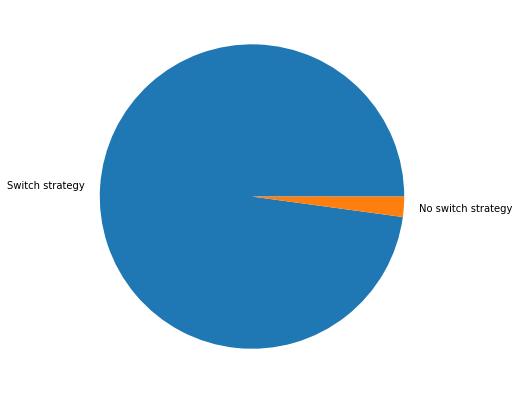

In [3]:
import random
import numpy as np
from matplotlib import pyplot as plt
m=0
s=0
class MontyHall(object):
    def __init__(self, doors, num_trials=10000):
        self.doors = doors
        self.trials = num_trials

    def get_door_to_open(self, opened_doors):
        all_doors = set(list(range(1, self.doors+1)))
        valid_doors = all_doors - opened_doors - set([self.car, self.contestant])
        return np.random.choice(list(valid_doors))

    def switch_the_door(self, opened_doors):
        all_doors = set(list(range(1, self.doors+1)))
        valid_doors = all_doors - opened_doors - set([self.contestant])
        return np.random.choice(list(valid_doors))

    def results_with_switch_strategy(self):    
        count_win = 0
        for t in range(self.trials):
            opened = set()
            self.contestant = random.randint(1, self.doors)
            self.car = random.randint(1, self.doors)
            while len(opened) < self.doors-2:
                # Monty opens a goat door.
                opened.add(self.get_door_to_open(opened))
            #Contestant can only switch once per trial.
            self.contestant = self.switch_the_door(opened) #Correction
            if self.contestant == self.car:
                count_win = count_win + 1
                m=count_win/self.trials*100
        return m
   

    def results_with_no_switch_strategy(self):
        count_win = 0
        for _ in range(self.trials):
            self.contestant = random.randint(1, self.doors)
            self.car = random.randint(1, self.doors)
            if self.contestant == self.car:
                count_win = count_win + 1
                s=count_win/self.trials*100
        return s

    def compare_strategies(self):
        print("Monty Hall %d doors: Percentage of Switch strategy and win probability is: %f" % (self.doors, self.results_with_switch_strategy()),"%")
        print("Monty Hall %d doors: Percentage of No switch strategy and win probability is: %f" % (self.doors, self.results_with_no_switch_strategy()),"%")
        # Creating dataset
        montyhall = ['Switch strategy', 'No switch strategy']
 
        data = [self.results_with_switch_strategy(),self.results_with_no_switch_strategy()]
 
        # Creating the graph
        fig = plt.figure(figsize =(10, 7))
        plt.pie(data, labels = montyhall)
 
        # show plot
        plt.show()
print("How many doors do you want?")
n=int(input())
MH_doors_3 = MontyHall(n)
MH_doors_3.compare_strategies()
# MH_doors_4 = MontyHall(4)
# MH_doors_4.compare_strategies()
# MH_doors_100 = MontyHall(100, num_trials=10000)
# MH_doors_100.compare_strategies()